In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
hou=pd.read_csv("housing.csv")

In [3]:
hou.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
hou.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


<function matplotlib.pyplot.show(close=None, block=None)>

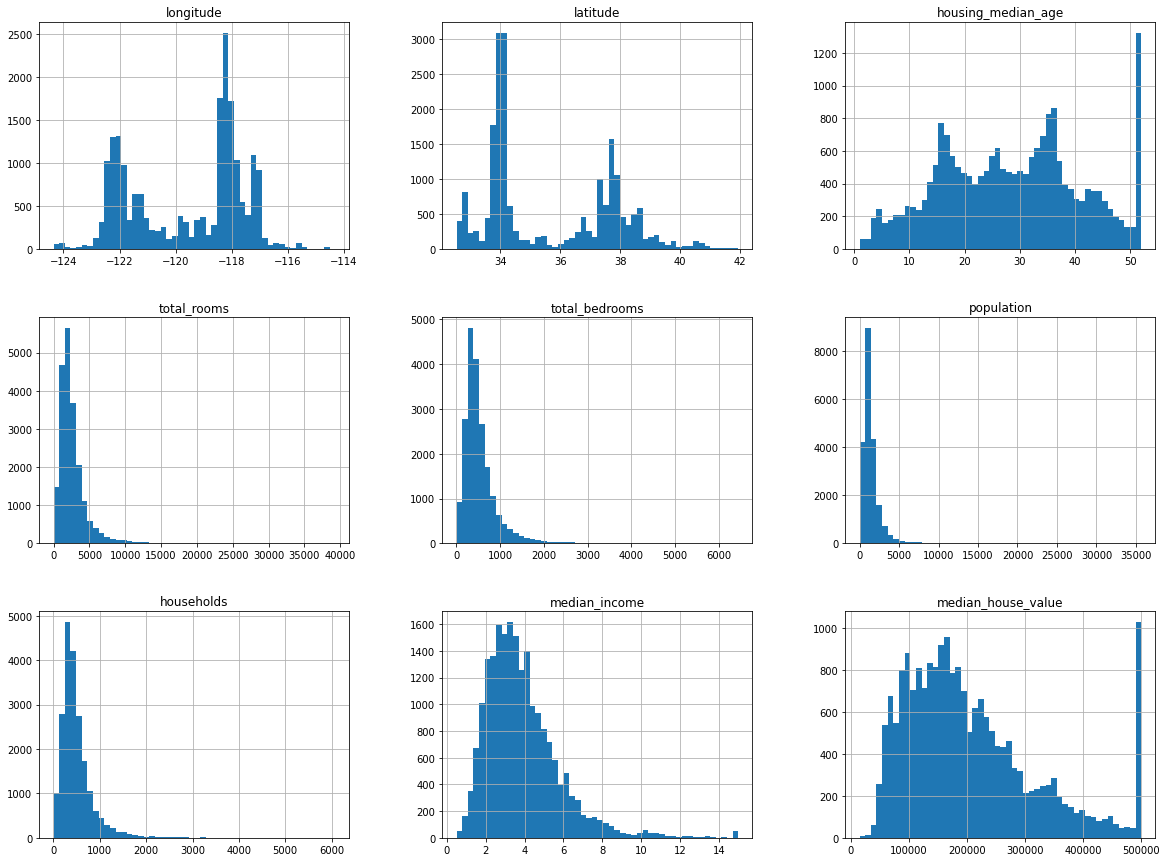

In [5]:
hou.hist(bins=50, figsize=(20,15))
plt.show

In [6]:
from sklearn.model_selection import train_test_split
train_set, test_set=train_test_split(hou, test_size=0.2, random_state=42)

In [7]:
hou["income_cat"]=np.ceil(hou["median_income"]/1.5)
hou["income_cat"].where(hou["income_cat"]<5, 5.0,inplace=True)

In [8]:
from sklearn.model_selection import StratifiedShuffleSplit

split=StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index,test_index in split.split(hou, hou["income_cat"]):
    strat_train_set=hou.loc[train_index]
    strat_test_set=hou.loc[test_index]

In [9]:
hou["income_cat"].value_counts()/len(hou)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [10]:
for set in(strat_train_set, strat_test_set):
    set.drop(["income_cat"],axis=1, inplace=True)

In [11]:
hou=strat_train_set.copy()

# Visualizing

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

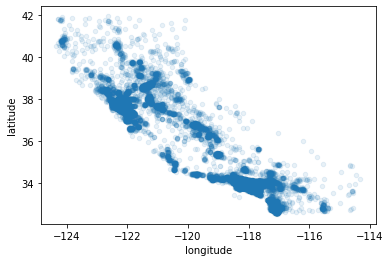

In [12]:
hou.plot(kind="scatter",x="longitude",y="latitude",alpha=0.1)

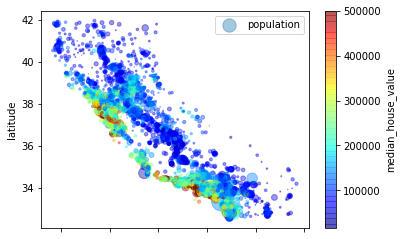

In [13]:
hou.plot(kind="scatter",x="longitude",y="latitude",alpha=0.4,s=hou["population"]/100,label="population",c="median_house_value",
        cmap=plt.get_cmap("jet"),colorbar=True,)
plt.legend()

In [14]:
#calculating Correlation
corr_matrix=hou.corr()

In [15]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

<AxesSubplot:>

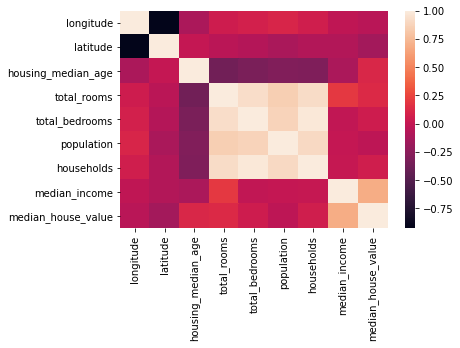

In [16]:
sns.heatmap(corr_matrix)

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

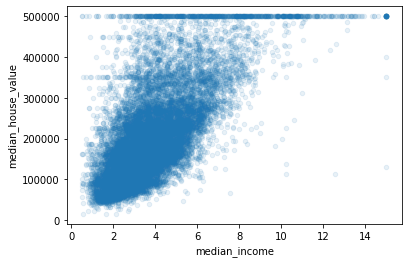

In [17]:
hou.plot(kind="scatter",x="median_income",y="median_house_value",alpha=0.1)

In [18]:
hou["rooms_per_household"]=hou["total_rooms"]/hou["households"]
hou["bedrooms_per_room"]=hou["total_bedrooms"]/hou["total_rooms"]
hou["population_per_household"]=hou["population"]/hou["households"]


In [20]:
corr_matrix=hou.corr()
corr_matrix["median_per_household"]=hou["population"]/hou["households"]

In [21]:
hou=strat_train_set.drop("median_house_value",axis=1)
housing_labels=strat_train_set["median_house_value"].copy()

# Data Cleaning

In [24]:
median=hou["total_bedrooms"].median()

In [28]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="median")

In [29]:
hou_num=hou.drop("ocean_proximity",axis=1)

In [30]:
imputer.fit(hou_num)

SimpleImputer(strategy='median')

In [31]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [33]:
hou_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [34]:
X=imputer.transform(hou_num)

In [38]:
hou_tr=pd.DataFrame(X,columns=hou_num.columns)

In [42]:
#Handling Text and Categorical Attributes

from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
housing_cat=hou["ocean_proximity"]
housing_cat_encoded=encoder.fit_transform(housing_cat)
housing_cat_encoded

array([0, 0, 4, ..., 1, 0, 3])

In [43]:
print(encoder.classes_)

['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


In [72]:
hou_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
1,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
2,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
4,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347
...,...,...,...,...,...,...,...,...
16507,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312
16508,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682
16509,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723
16510,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625


In [45]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder()
housing_cat_1hot=encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [47]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [49]:
from sklearn.preprocessing import LabelBinarizer
encoder=LabelBinarizer()
housing_cat_1hot=encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       ...,
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]])

# Feature Scaling

In [53]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
num_pipeline=Pipeline([('imputer',SimpleImputer(strategy="median")),('attribs_adder',CombinedAttributesAdder()),('str_scaller',StandardScaler()),])
housing_num_tr=num_pipeline.fit_transform(housing_num)

NameError: name 'CombinedAttributesAdder' is not defined

In [57]:
from sklearn.preprocessing import MinMaxScaler
norm=MinMaxScaler().fit(hou_num)
X_train_norm=norm.transform(hou_num)

In [71]:
hou_num.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214


from sklearn.preprocessing import MinMaxScaler
norm=MinMaxScaler().fit(hou_num)
housing_num_tr=norm.transform(hou_num)

In [66]:
housing_num_tr

array([[0.24501992, 0.50478215, 0.7254902 , ..., 0.01981558, 0.06292009,
        0.15201859],
       [0.24103586, 0.47927736, 0.25490196, ..., 0.00849239, 0.02072442,
        0.40837368],
       [0.71215139, 0.02444208, 0.58823529, ..., 0.02614984, 0.08588499,
        0.1629081 ],
       ...,
       [0.79183267, 0.16471838, 0.15686275, ..., 0.05871801, 0.14245706,
        0.19119736],
       [0.6314741 , 0.1360255 , 0.58823529, ..., 0.03792147, 0.0660941 ,
        0.24569316],
       [0.18924303, 0.55579171, 1.        , ..., 0.03548306, 0.11893204,
        0.21207294]])

In [74]:
from sklearn.preprocessing import LabelEncoder 
  
le = LabelEncoder() 
  
hou['ocean_proximity']= le.fit_transform(hou['ocean_proximity']) 
#data['Geography']= le.fit_transform(data['Geography']) 

In [75]:
hou.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,0
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,0
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,4
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,1
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,0


In [157]:
# from sklearn.pipeline import FeatureUnion
# num_attribs=list(hou_num)
# cat_attribs=["ocean_proximity"]

# num_pipeline=Pipeline([('selector',DataFrameSelector(num_attribs)),
#                        ('imputer',Imputer(strategy="median")),
#                        ('attribs_adder',CombinedAttributesAdder()),
#                        ('std_scaler',StandardScaler()),
#                       ])

# cat_pipeline=Pipeline([('selector',DataFrameSelector(cat_attribs)),
#                       ('label_binarizer',LabelBinarizer(),
#                       )])

# full_pipeline=FeatureUnion(transformer_list=[
#     ("num_pipeline",num_pipeline),
#     ("cat_pipeline",cat_pipeline)
# ])



In [116]:
hou.shape

(16512, 9)

In [117]:
hou.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        158
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

In [118]:
#hou1=hou.dropna()
hou1=hou.fillna(method ='bfill') 

<AxesSubplot:>

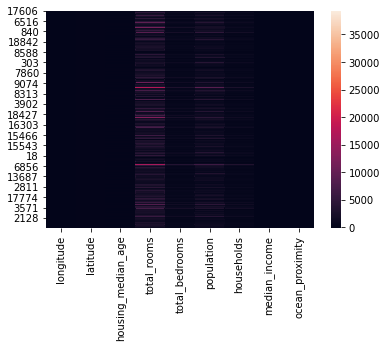

In [119]:
sns.heatmap(hou1)

In [120]:
hou1.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
dtype: int64

In [123]:
from sklearn.preprocessing import MinMaxScaler
norm=MinMaxScaler().fit(hou1)
X_train_norm=norm.transform(hou1)

In [124]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(hou1,housing_labels)

LinearRegression()

In [125]:
housing_labels

17606    286600.0
18632    340600.0
14650    196900.0
3230      46300.0
3555     254500.0
           ...   
6563     240200.0
12053    113000.0
13908     97800.0
11159    225900.0
15775    500001.0
Name: median_house_value, Length: 16512, dtype: float64

In [126]:
from sklearn.metrics import mean_squared_error
housing_pred=lin_reg.predict(hou1)
lin_mse=mean_squared_error(housing_labels, housing_pred)
lin_rmse=np.sqrt(lin_mse)
lin_mse

4903212558.93339

In [143]:
from sklearn.tree import DecisionTreeRegressor
tree_reg=DecisionTreeRegressor()
tree_reg.fit(hou1,housing_labels)

DecisionTreeRegressor()

In [146]:
pred=tree_reg.predict(hou1)
tree_mse=mean_squared_error(housing_labels,pred)
tree_rmse=np.sqrt(tree_mse)
tree_rmse

0.0

# Using Cross Validation

In [148]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(tree_reg,hou1,housing_labels,scoring="neg_mean_squared_error",cv=10)
rmse_scores=np.sqrt(-scores)

In [152]:
def display_scores(scores):
    print("Scores: ",scores)
    print("Mean: ",scores.mean())
    print("Standard deviation: ",scores.std())

In [153]:
display_scores(rmse_scores)

Scores:  [66410.31866064 69081.62603219 72524.74912842 72277.49310799
 68570.49940589 73932.81716172 67817.28975164 68740.33904682
 70826.06072757 69299.03793115]
Mean:  69948.0230954035
Standard deviation:  2242.7384279967137


In [154]:
from sklearn.ensemble import RandomForestRegressor
forest_reg=RandomForestRegressor()
forest_reg.fit(hou1,housing_labels)

RandomForestRegressor()

In [156]:
pred=forest_reg.predict(hou1)
forest_mse=mean_squared_error(housing_labels,pred)
tree_rmse=np.sqrt(forest_mse)
tree_rmse

18645.896313164492